In [61]:
import numpy as np
import pandas as pd
import os
import sys
import h5py
from collections import defaultdict
from importlib import reload

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
import os
import sys

walk_dir = '/Users/Maxwell/galvanize/production-value/data/A/A/A'

print('walk_dir = ' + walk_dir)

# If your current working directory may change during script execution, it's recommended to
# immediately convert program arguments to an absolute path. Then the variable root below will
# be an absolute path as well. Example:
# walk_dir = os.path.abspath(walk_dir)
print('walk_dir (absolute) = ' + os.path.abspath(walk_dir))

for root, subdirs, files in os.walk(walk_dir):
    print('--\nroot = ' + root)
    list_file_path = os.path.join(root, 'my-directory-list.txt')
    print('list_file_path = ' + list_file_path)

    with open(list_file_path, 'wb') as list_file:
        for subdir in subdirs:
            print('\t- subdirectory ' + subdir)

        for filename in files:
            file_path = os.path.join(root, filename)

            print('\t- file %s (full path: %s)' % (filename, file_path))

            with open(file_path, 'rb') as f:
                f_content = f.read()
                list_file.write(('The file %s contains:\n' % filename).encode('utf-8'))
                list_file.write(f_content)
                list_file.write(b'\n')

walk_dir = /Users/Maxwell/galvanize/production-value/data/A/A/A
walk_dir (absolute) = /Users/Maxwell/galvanize/production-value/data/A/A/A
--
root = /Users/Maxwell/galvanize/production-value/data/A/A/A
list_file_path = /Users/Maxwell/galvanize/production-value/data/A/A/A/my-directory-list.txt
	- file TRAAAAW128F429D538.h5 (full path: /Users/Maxwell/galvanize/production-value/data/A/A/A/TRAAAAW128F429D538.h5)
	- file TRAAAEF128F4273421.h5 (full path: /Users/Maxwell/galvanize/production-value/data/A/A/A/TRAAAEF128F4273421.h5)
	- file TRAAARJ128F9320760.h5 (full path: /Users/Maxwell/galvanize/production-value/data/A/A/A/TRAAARJ128F9320760.h5)
	- file my-directory-list.txt (full path: /Users/Maxwell/galvanize/production-value/data/A/A/A/my-directory-list.txt)
	- file TRAAABD128F429CF47.h5 (full path: /Users/Maxwell/galvanize/production-value/data/A/A/A/TRAAABD128F429CF47.h5)
	- file TRAAAVG12903CFA543.h5 (full path: /Users/Maxwell/galvanize/production-value/data/A/A/A/TRAAAVG12903CFA543.h5

In [4]:
!pwd

/Users/Maxwell/galvanize/production-value


In [2]:
def list_h5(walk_dir):
    """
    Makes a list of filepath strings for every file in directory
    
    INPUT:
    walk_dir: string filepath to a directory
    
    OUTPUT:
    file_list: a list of filepath strings
    """
    
    file_list = []
    for root, subdirs, files in os.walk(walk_dir):
#         for subdir in subdirs:
#             print('\t- subdirectory ' + subdir)

        for filename in files:
            file_path = os.path.join(root, filename)
            if file_path[-2:] == 'h5':
                file_list.append(file_path)

#             print('\t- file %s (full path: %s)' % (filename, file_path))

#             with open(file_path, 'rb') as f:
#                 f_content = f.read()
#                 list_file.write(('The file %s contains:\n' % filename).encode('utf-8'))
#                 list_file.write(f_content)
#                 list_file.write(b'\n')
    return file_list

In [4]:
w2 = '/Users/Maxwell/galvanize/production-value/data/A/A/'
list_h5(w2)

['/Users/Maxwell/galvanize/production-value/data/A/A/R/TRAARRG12903CDB456.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/R/TRAARSF12903CD1B12.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/R/TRAARHS128F931689D.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/R/TRAARUN128F932B1A0.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/U/TRAAUGD128F42734DA.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/U/TRAAUZX128F92F3D53.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/U/TRAAUIH128F4254C9D.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/U/TRAAUKK128F933A680.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/U/TRAAUMJ128F933BDB6.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/U/TRAAUEO128E0780CB9.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/U/TRAAUDN128F933F20D.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A/U/TRAAUWD128F930DD4E.h5',
 '/Users/Maxwell/galvanize/production-value/data/A/A

In [7]:
import src.MSDS_conversion as msds

In [12]:
reload(msds)

<module 'src.MSDS_conversion' from '/Users/Maxwell/galvanize/production-value/src/MSDS_conversion.py'>

In [26]:
def dir_to_h5df(walk_dir, N):
    """
    Converts the first N .h5 files in a directory (or its subdirectories) to a Pandas DataFrame
    
    INPUTS:
    walk_dir: STR path to the root directory of the files
    N: number of files to put in the directory. If N = 'all', all files will be converted.
    
    OUTPUTS:
    h5df: PANDAS DATAFRAME where each row is the information in an .h5 file
    """
    
    h5_file_list = list_h5(walk_dir)
    
    if (N == 'all') or (N > len(h5_file_list)):
        files_to_convert = h5_file_list
    else:
        files_to_convert = h5_file_list[:N]
    
    # Convert list of files names to list of dictionaries
    
    h5_df_list = []
    
    for filename in files_to_convert:
        f = h5py.File(filename, 'r')
#         h5_dict = multi_indexer(h5_to_dict(f))
        h5_df = pd.DataFrame(msds.multi_indexer(msds.h5_to_dict(f)))
        h5_df_list.append(h5_df)
        
    h5df = pd.concat(h5_df_list, ignore_index=True)
    
    return h5df
        

In [27]:
df = dir_to_h5df(w2, 10)

In [28]:
df

analysis  \
                                     bars_confidence   
0  [0.005, 0.088, 0.017, 0.027, 0.044, 0.254, 0.4...   
1  [0.168, 0.133, 0.311, 0.34, 0.793, 0.241, 0.11...   
2  [0.071, 0.096, 0.501, 0.173, 0.044, 0.7, 0.195...   
3  [0.007, 0.18, 0.173, 0.057, 0.008, 0.123, 0.43...   
4  [0.174, 0.056, 0.171, 0.002, 0.011, 0.043, 0.0...   
5  [0.135, 0.308, 0.115, 0.124, 0.505, 0.134, 0.2...   
6  [0.008, 0.154, 0.149, 0.053, 0.039, 0.034, 0.2...   
7  [0.1, 0.064, 0.027, 0.073, 0.004, 0.124, 0.017...   
8  [0.422, 0.303, 0.021, 0.155, 0.019, 0.063, 0.0...   
9  [0.381, 0.061, 0.001, 0.125, 0.368, 0.573, 0.4...   

                                                      \
                                          bars_start   
0  [0.88942, 2.40052, 3.90322, 5.40499, 6.90397, ...   
1  [0.76458, 2.63485, 4.44621, 6.33987, 8.2279, 1...   
2  [1.03982, 2.62754, 4.21462, 5.79013, 7.36552, ...   
3  [1.11054, 2.99649, 4.87299, 6.74848, 8.6137, 1...   
4  [0.86869, 2.81287, 4.82044, 6.83859, 8.85129, ...   
5  [0.03033, 0.91194, 1.7943, 2.6833, 3.68451, 4....   
6  [0.2753, 1.26818, 2.25856, 3.24021, 4.22435, 5...   
7  [1.9407, 4.568, 7.19118, 9.82096, 12.45075, 15...   
8  [0.25594, 2.0886, 3.94676, 5.79239, 7.63914, 9...   
9  [1.03723, 3.24774, 5.45918, 7.67999, 9.90361, ...   

                                                      \
                                    beats_confidence   
0  [0.507, 0.468, 0.375, 0.255, 0.53, 0.37, 0.467...   
1  [0.0, 0.0, 0.853, 0.363, 0.559, 0.079, 0.0, 0....   
2  [0.938, 0.516, 0.0, 0.4, 0.559, 0.0, 0.348, 0....   
3  [0.838, 0.877, 0.562, 0.766, 0.769, 0.854, 0.6...   
4  [0.737, 0.963, 0.808, 0.733, 0.943, 0.979, 0.8...   
5  [0.0, 0.157, 0.225, 0.548, 0.471, 0.302, 0.462...   
6  [0.989, 0.935, 0.88, 0.83, 0.772, 0.713, 0.652...   
7  [0.995, 0.939, 0.871, 0.0, 0.805, 0.0, 0.891, ...   
8  [0.852, 0.664, 0.54, 0.0, 0.0, 0.408, 0.48, 0....   
9  [0.775, 0.911, 0.564, 0.509, 0.709, 0.67, 0.68...   

                                                      \
                                         beats_start   
0  [0.88942, 1.26696, 1.64264, 2.02297, 2.40052, ...   
1  [0.38884, 0.76458, 1.14032, 1.51605, 1.8974, 2...   
2  [0.25338, 0.63721, 1.03982, 1.43354, 1.83318, ...   
3  [0.1732, 0.64258, 1.11054, 1.58181, 2.05087, 2...   
4  [0.38598, 0.86869, 1.3578, 1.83733, 2.32755, 2...   
5  [0.03033, 0.32444, 0.61856, 0.91194, 1.20606, ...   
6  [0.2753, 0.52445, 0.77236, 1.01902, 1.26818, 1...   
7  [0.63157, 1.28737, 1.9407, 2.59979, 3.25641, 3...   
8  [0.25594, 0.71698, 1.16767, 1.62986, 2.0886, 2...   
9  [0.48534, 1.03723, 1.58774, 2.13939, 2.69444, ...   

                                                      \
                                 sections_confidence   
0  [1.0, 0.458, 0.138, 0.301, 0.669, 0.516, 0.996...   
1                      [1.0, 1.0, 1.0, 0.479, 0.348]   
2  [1.0, 1.0, 0.389, 0.704, 0.724, 0.388, 0.643, ...   
3  [1.0, 0.202, 0.325, 0.293, 0.391, 0.043, 0.306...   
4     [1.0, 0.976, 0.672, 0.874, 0.631, 0.63, 0.721]   
5  [1.0, 0.656, 0.581, 0.313, 0.274, 0.438, 0.257...   
6  [1.0, 0.807, 0.68, 0.389, 0.764, 0.396, 0.3, 0...   
7  [1.0, 0.729, 0.622, 0.297, 0.44, 0.14, 0.263, ...   
8  [1.0, 0.96, 0.596, 0.678, 0.057, 0.456, 0.629,...   
9  [1.0, 0.582, 0.297, 0.372, 0.613, 0.806, 0.845...   

                                                      \
                                      sections_start   
0  [0.0, 12.40949, 33.86513, 47.97004, 73.99013, ...   
1       [0.0, 7.85497, 23.85339, 37.18821, 45.62191]   
2  [0.0, 6.58084, 24.70751, 44.845, 76.81754, 88....   
3  [0.0, 31.53264, 46.02109, 60.99337, 80.63561, ...   
4  [0.0, 24.91439, 63.56777, 97.20426, 122.31641,...   
5  [0.0, 8.03648, 19.58656, 43.6715, 64.15977, 84...   
6  [0.0, 12.90862, 38.88378, 66.02934, 85.96166, ...   
7  [0.0, 8.50195, 26.89815, 45.95575, 59.09682, 7...   
8  [0.0, 4.40793, 41.33822, 57.02276, 81.50867, 9...   
9  [0.0, 8.236, 19.32226, 36.51378, 62.28778, 124...   

      

In [29]:
df.analysis.columns

Index(['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start',
       'sections_confidence', 'sections_start', 'segments_confidence',
       'segments_loudness_max', 'segments_loudness_max_time',
       'segments_loudness_start', 'segments_pitches', 'segments_start',
       'segments_timbre', 'songs', 'tatums_confidence', 'tatums_start'],
      dtype='object')

In [37]:
len(df.analysis.segments_pitches[0]), df.analysis.segments_pitches[0][0].shape

(751, (12,))

In [73]:
df.metadata.songs[0][0].dtype
df.metadata.songs[0][0][9].decode()
df.metadata.songs[0][0][18].decode()

"Pulecenella 'e mò"

Text(0.5, 1.0, "Pitch intensity over time for 'Pulecenella 'e mò' by 'Gloriana'")

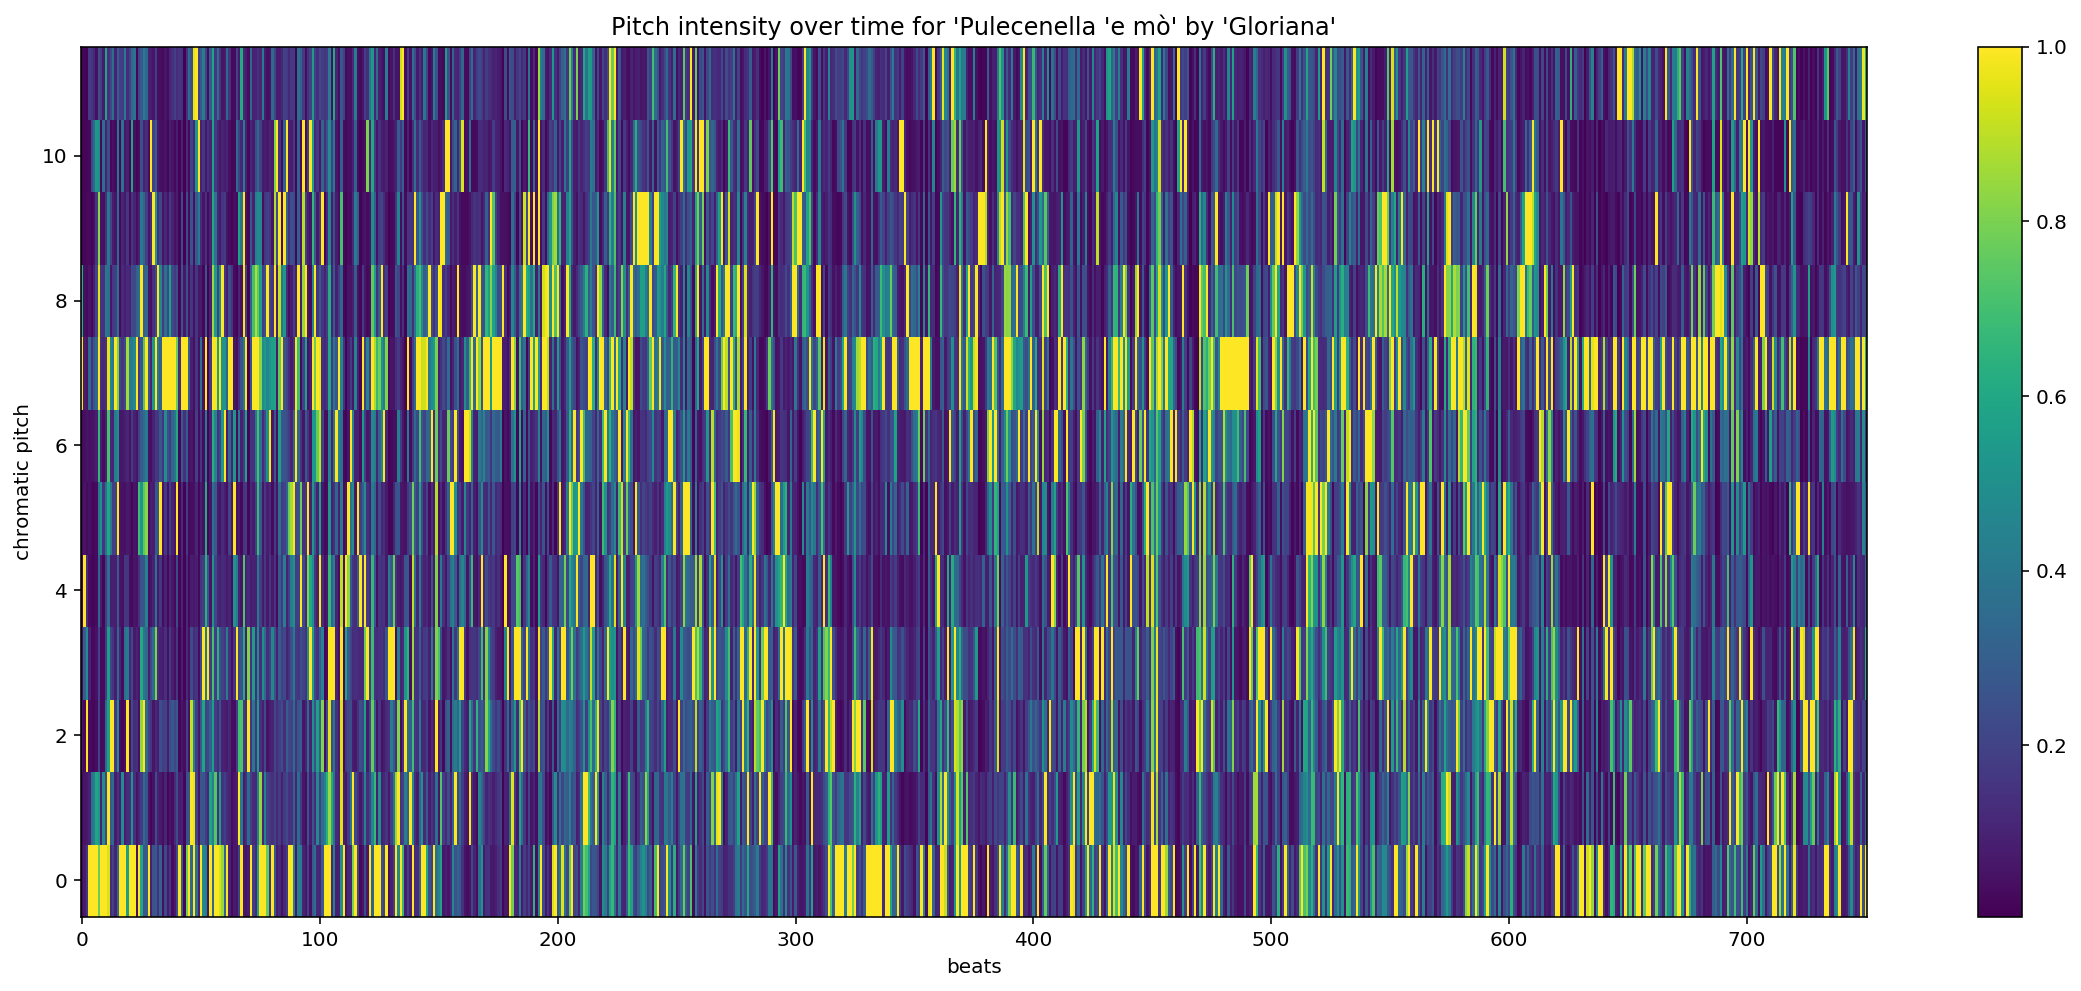

In [75]:
artist_name = df.metadata.songs[0][0][9].decode()
song_name = df.metadata.songs[0][0][18].decode()

plt.figure(figsize=(20,8))
plt.imshow(np.stack(df.analysis.segments_pitches[0]).T, aspect='auto', origin = 'lower')
plt.xlabel('beats')
plt.ylabel('chromatic pitch')
plt.colorbar()
plt.title("Pitch intensity over time for '{}' by '{}'".format(song_name, artist_name))

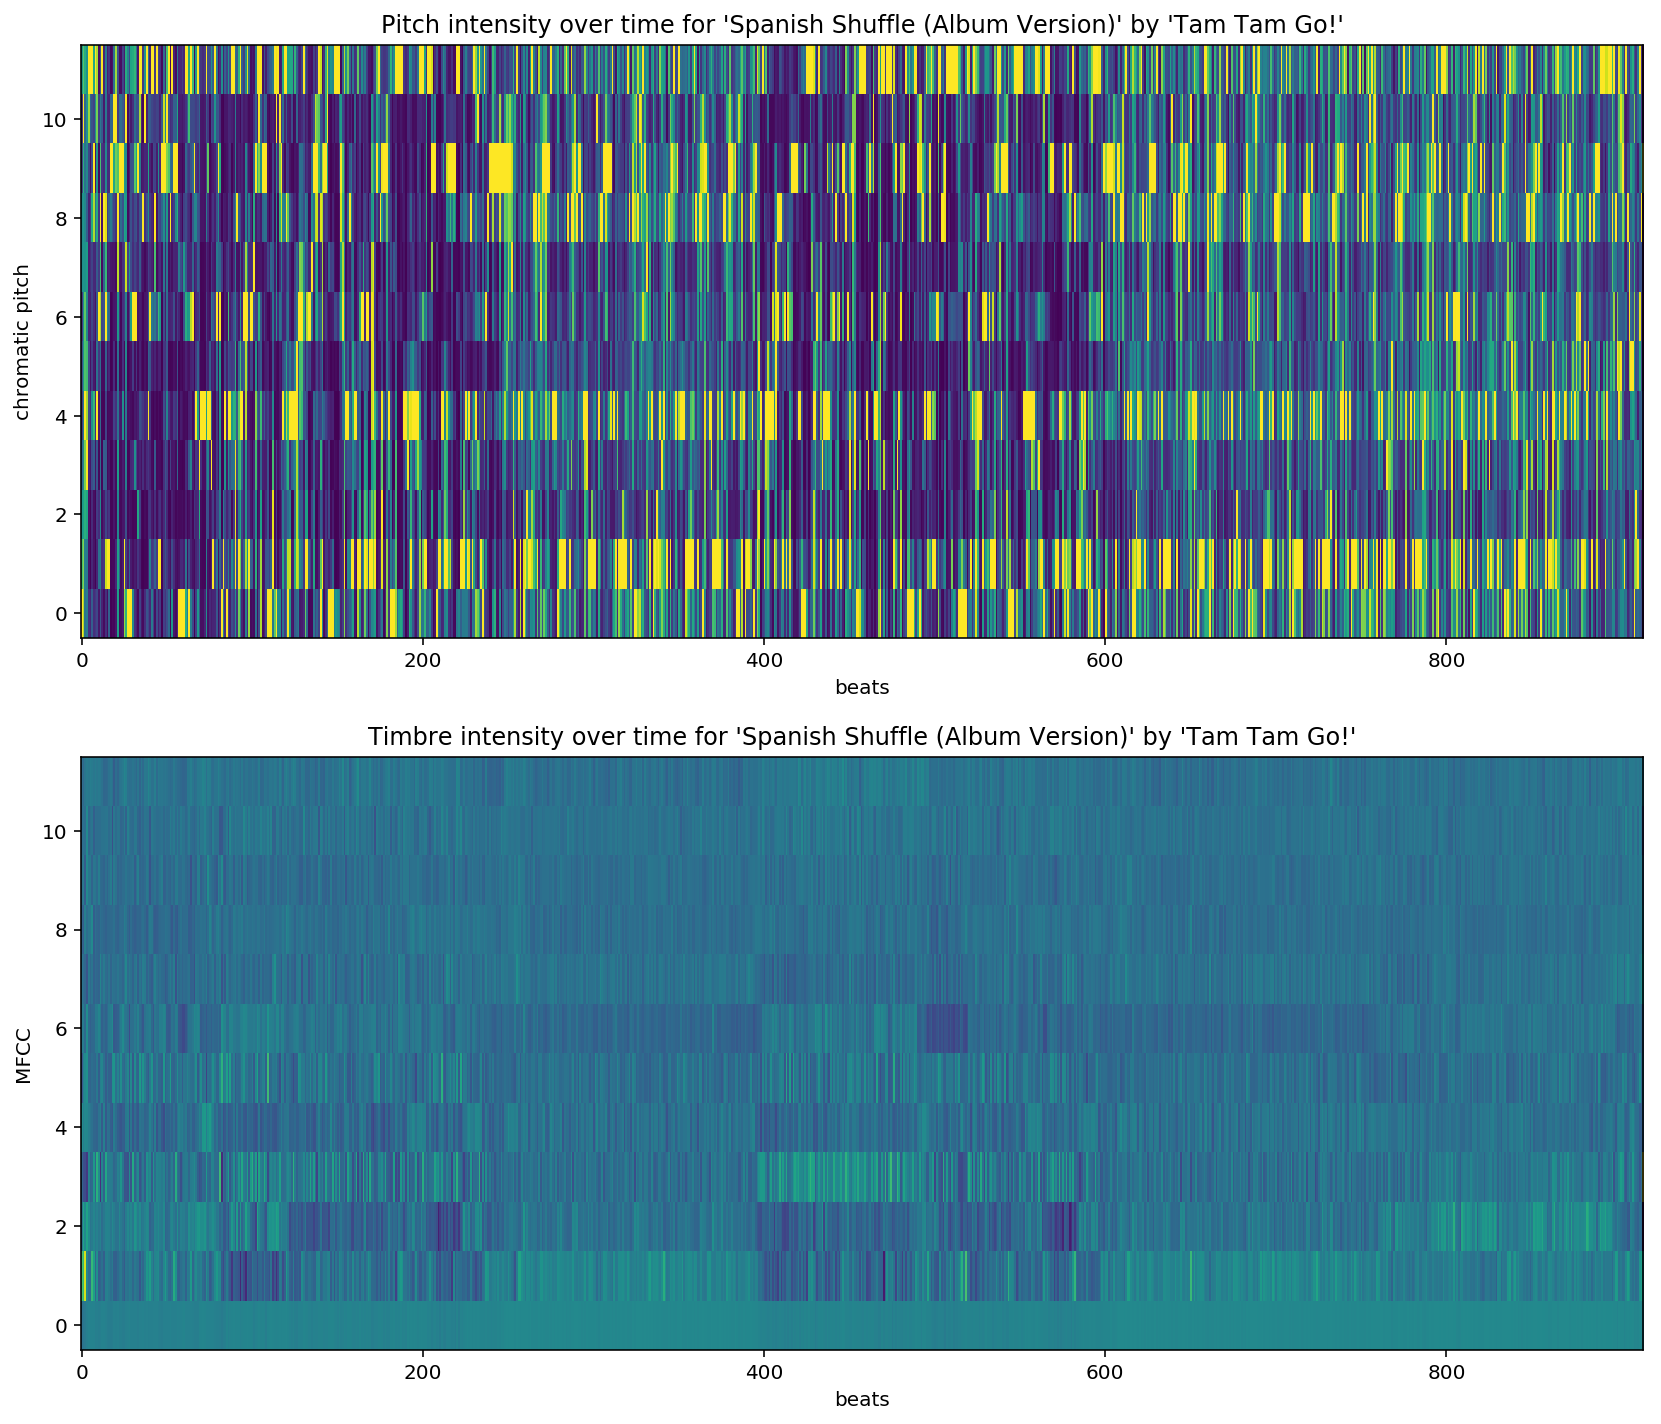

In [88]:
i = 4

artist_name = df.metadata.songs[i][0][9].decode()
song_name = df.metadata.songs[i][0][18].decode()

fig, axs = plt.subplots(2, figsize=(14, 12))
axs[0].imshow(np.stack(df.analysis.segments_pitches[i]).T, aspect='auto', origin = 'lower')
axs[0].set_xlabel('beats')
axs[0].set_ylabel('chromatic pitch')
# axs[0].colorbar()
axs[0].set_title("Pitch intensity over time for '{}' by '{}'".format(song_name, artist_name))

axs[1].imshow(np.stack(df.analysis.segments_timbre[i]).T, aspect='auto', origin = 'lower')
axs[1].set_xlabel('beats')
axs[1].set_ylabel('MFCC')
# axs[1].colorbar()
axs[1].set_title("Timbre intensity over time for '{}' by '{}'".format(song_name, artist_name))

fig.show()

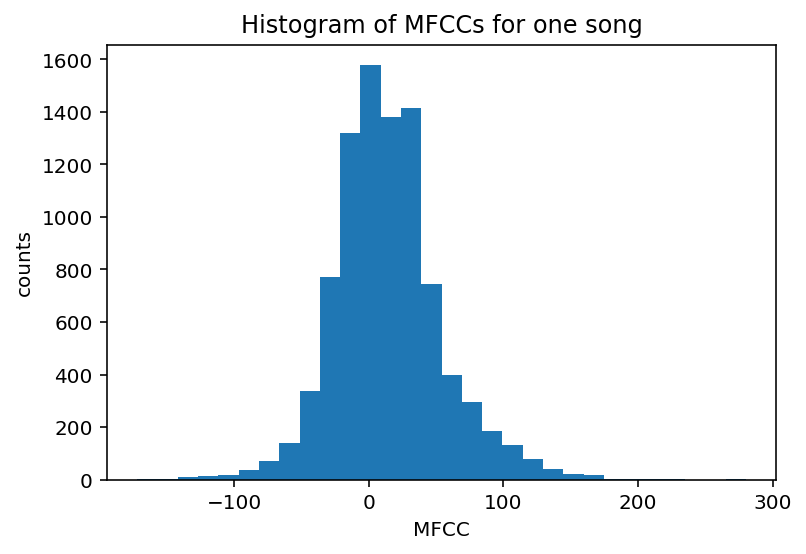

In [111]:
plt.hist(np.stack(df.analysis.segments_timbre[0]).flatten(), bins = 30)
plt.xlabel('MFCC')
plt.ylabel('counts')
plt.title('Histogram of MFCCs for one song')
plt.show()